In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# For Hopkins Statistics
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

In [3]:
# Reading the dataset

country = pd.read_csv('C:/Users/abhi/Downloads/HELP Assignment - Clustering/Country-data.csv')
country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Checking the number of rows and columns

country.shape

(167, 10)

In [5]:
# Checking the data-types of each columns

country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
# Descriptive Statistics

country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


##### Insight: 
- The dataset has 167 rows and 10 columns. 1 variable is of object type, 1 variable is of int type and rest all are of float type.
- From the descriptive statitics we can define that there are too much variability among the data points so, we need to scale them in order to do the proper analysis.           

## Missing value check

In [7]:
# With the help of .isnull() function we can check the missing values in the dataset

country.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

##### Insight:

- There seems no MISSING Value present in the dataset.

## Dropping Duplicates

In [8]:
# Shape before dropping duplicates 

country.shape

(167, 10)

In [9]:
# Dropping the duplicates if any present in the dataset

country.drop_duplicates(subset=None, inplace=True)

In [10]:
# Shape after dropping duplicates

country.shape

(167, 10)

##### Insight:
- As we checked that none of the rows were removed when using the .drop_duplicates function as it proves that there were no duplicates present.

## Data Transformation

- Our dataset has attributes which has a %age value so we need to convert those attributes to its absolute value so as gain a uniformity in the dataset.
- Columns which needs to be transformed are, 'Imports','Exports',Health'.

In [11]:
# Checking our dataset

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [12]:
# Converting 'Import', 'Export' and 'Health' columns to absolute values.

country['imports'] = country.imports * country.gdpp /100
country['exports'] = country.exports * country.gdpp /100
country['health'] = country.health * country.gdpp /100

In [13]:
# Looking at the dataset for the confirmation

country.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


## Outlier Treatment

In [14]:
# Looking at the info of the dataset

country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.4+ KB


In [15]:
# Descriptive Statistics

country.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


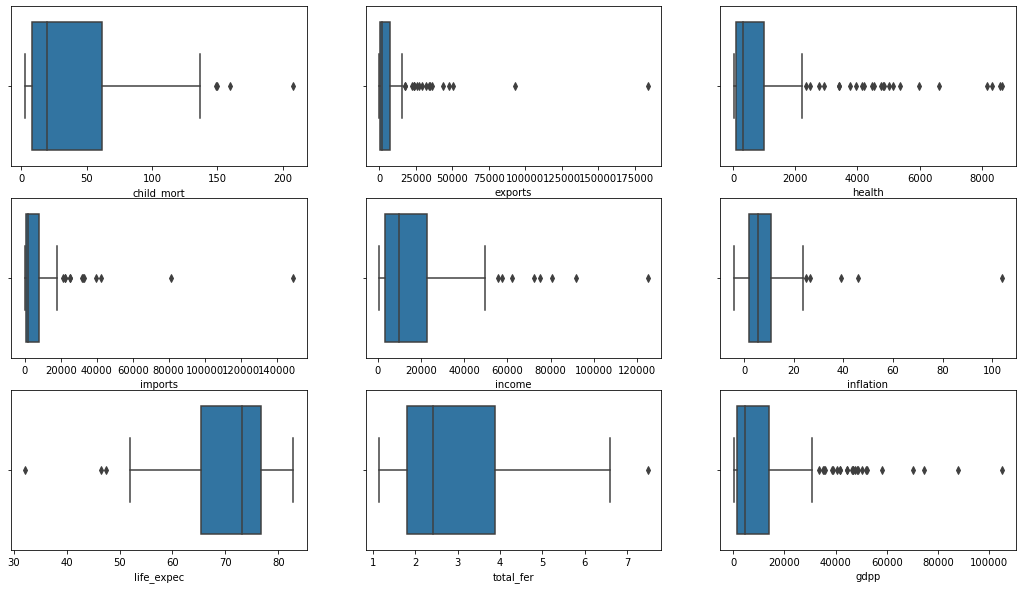

In [16]:
# Checking the outliers with the help of Boxplots

plt.figure(figsize=(18, 10))

plt.subplot(3,3,1)
sns.boxplot(country.child_mort)

plt.subplot(3,3,2)
sns.boxplot(country.exports)

plt.subplot(3,3,3)
sns.boxplot(country.health)

plt.subplot(3,3,4)
sns.boxplot(country.imports)

plt.subplot(3,3,5)
sns.boxplot(country.income)

plt.subplot(3,3,6)
sns.boxplot(country.inflation)

plt.subplot(3,3,7)
sns.boxplot(country.life_expec)

plt.subplot(3,3,8)
sns.boxplot(country.total_fer)

plt.subplot(3,3,9)
sns.boxplot(country.gdpp)

plt.show()

##### Note:
- From the Outlier analysis and looking into the boxplots of various numerical columns, we can see that there are outliers in some of the attributes.
- If we tend to treat any of the outlier either by capping those value or by removing it might not the correct country which needs a dire aid.
- By understanding the business logic and statement, I decided to keep the outlier values as it'll not remove the country that needs a dire aid.

## Exploratory Data Analysis

### Data Visualization

In [17]:
# Looking out columns of the dataset

country.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

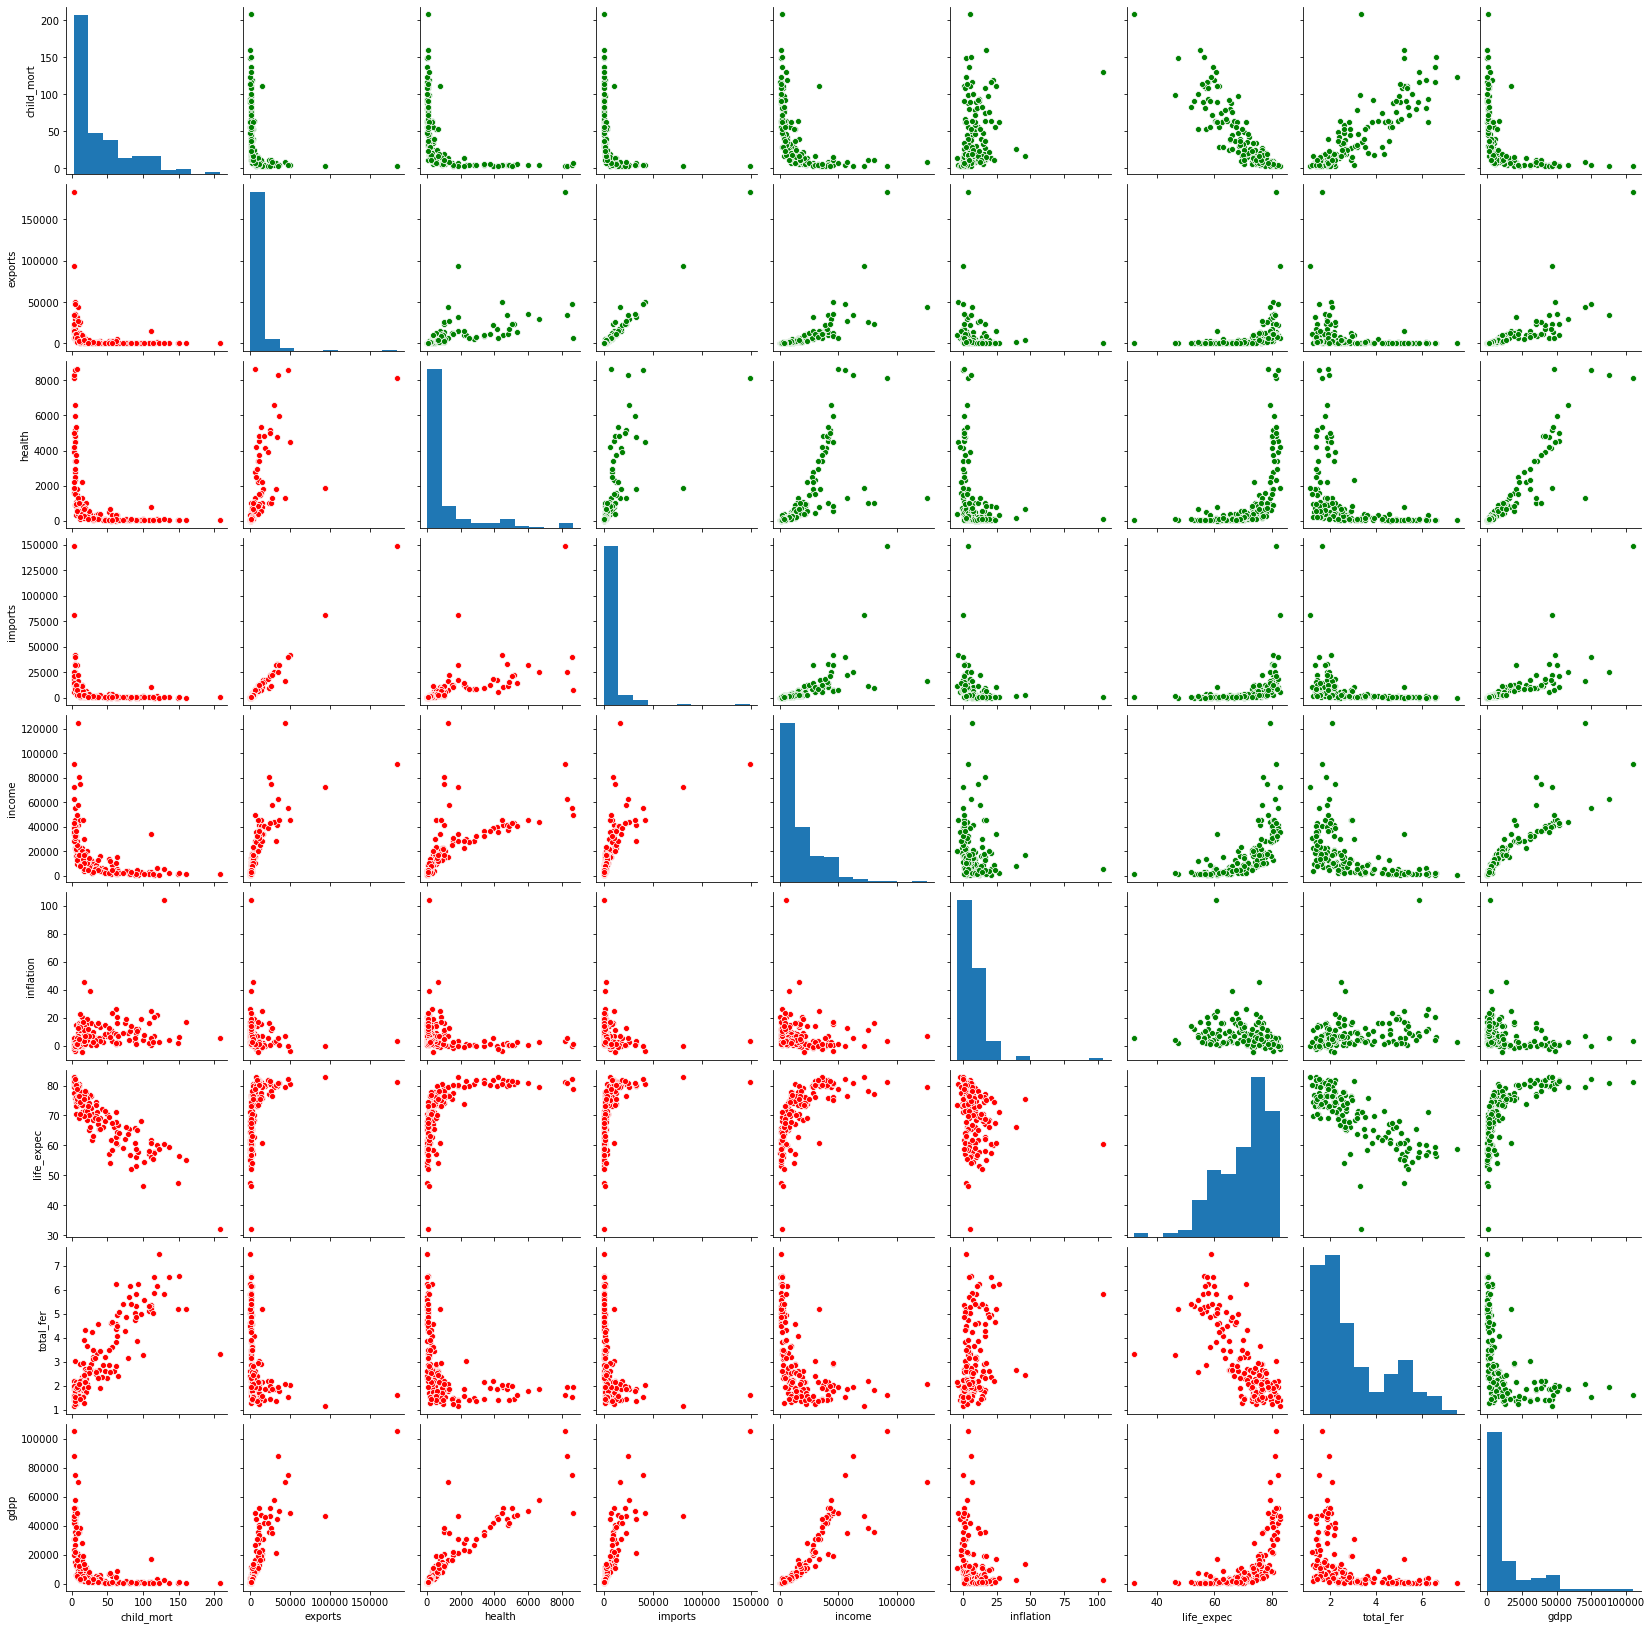

In [18]:
# Using the Pairplot we can find that if there is any visible relations between the variables.

pair = country[['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']]

pair_plot = sns.pairplot(pair)
pair_plot.map_upper(sns.scatterplot, color='green')
pair_plot.map_lower(sns.scatterplot, color='red')

plt.show()

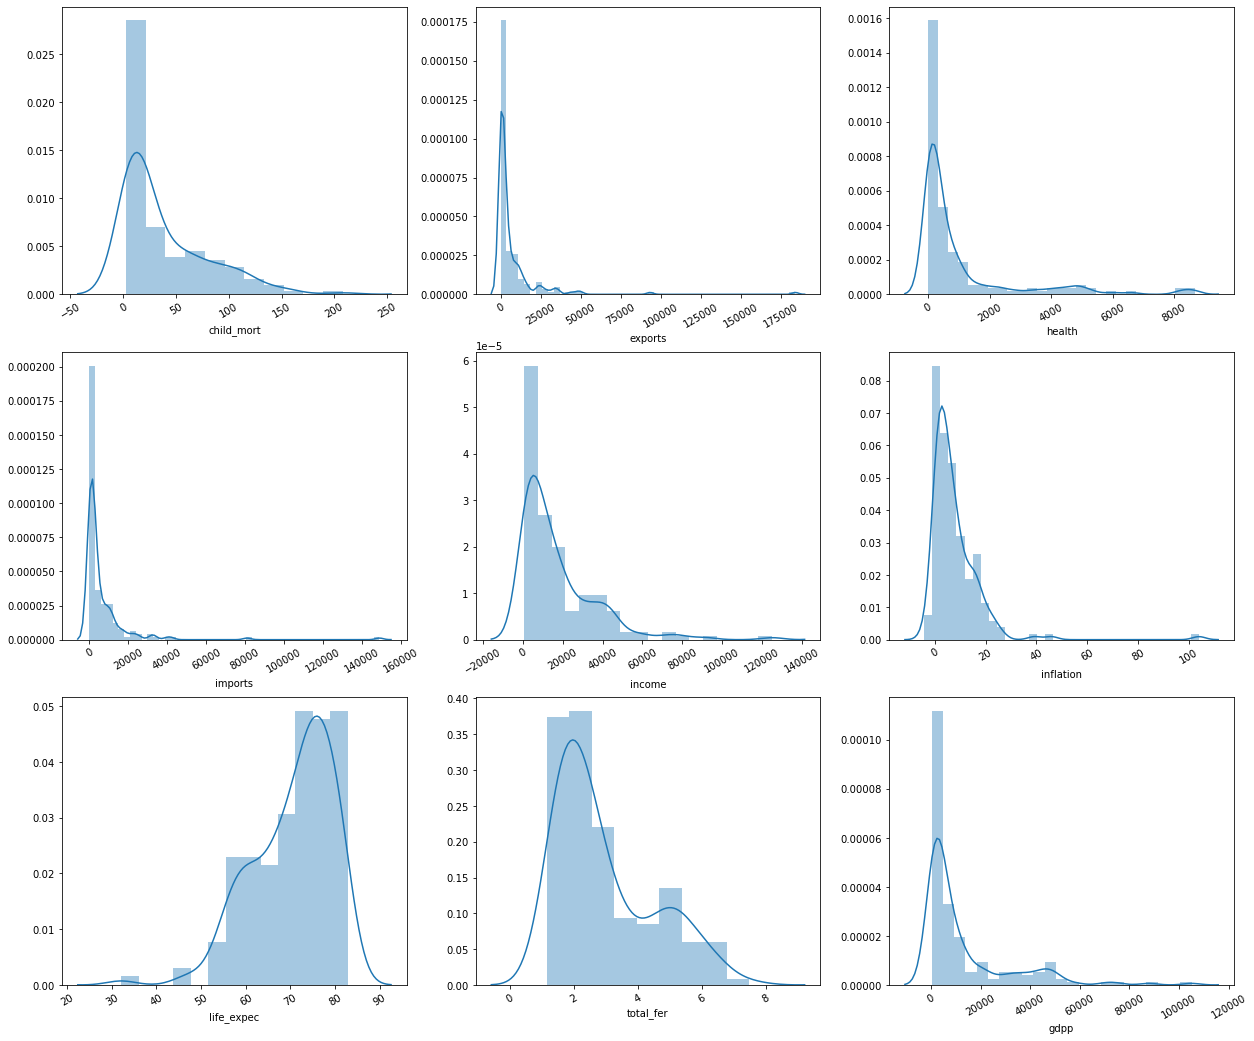

In [19]:
# Using the distplot, checking the variance of each column

plt.figure(figsize=[21,18])

plt.subplot(3,3,1)
sns.distplot(country.child_mort)
plt.xticks(rotation = 30)

plt.subplot(3,3,2)
sns.distplot(country.exports)
plt.xticks(rotation = 30)

plt.subplot(3,3,3)
sns.distplot(country.health)
plt.xticks(rotation = 30)

plt.subplot(3,3,4)
sns.distplot(country.imports)
plt.xticks(rotation = 30)

plt.subplot(3,3,5)
sns.distplot(country.income)
plt.xticks(rotation = 30)

plt.subplot(3,3,6)
sns.distplot(country.inflation)
plt.xticks(rotation = 30)

plt.subplot(3,3,7)
sns.distplot(country.life_expec)
plt.xticks(rotation = 30)

plt.subplot(3,3,8)
sns.distplot(country.total_fer)
plt.xticks(rotation = 30)

plt.subplot(3,3,9)
sns.distplot(country.gdpp)
plt.xticks(rotation = 30)

plt.show()

##### Insight:
- From the distplot we can make out that none of the attributes show a Normal Distribution.
- We need to scale the data points as to help the model make a better model as the values in the data points are different and they vary in different ranges, which is very much difficult for the model to learn and implement the same.

## Scaling the data

- We will use the StandardScaler for scaling the dataset

In [20]:
# Instantiate

standard = StandardScaler()

In [21]:
# Scaling only for the numerical variables

country_num = country[['child_mort','exports','health','imports','income',
                       'inflation','life_expec','total_fer','gdpp']].copy()

In [22]:
# Numerical Information

country_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 13.0 KB


In [23]:
# fit_transform

country_scaled = standard.fit_transform(country_num)

In [24]:
country_scaled

array([[ 1.29153238, -0.4110113 , -0.56503989, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.35019096, -0.43921769, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.31852577, -0.48482608, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541, -0.36146329, -0.53848844, ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.39216643, -0.55059641, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.38395214, -0.54049845, ..., -2.09278484,
         1.6246091 , -0.62954556]])

In [25]:
# Converting it to a dataframe

country_scaled = pd.DataFrame(country_scaled)
country_scaled.columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


## Hopkins Statistics

In [26]:
# Function for initalizing the hopkins statistics

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [27]:
# Checking the hopkins stat. for our dataset

hopkins(country_scaled)

0.9430268974162019

##### Insight:
- Hopkins Statistics that was calculated above for our dataset is well around 1, so its a good score and hence our dataset is cluster friendly.

## Modelling

### Hierarchical Clustering

In [28]:
# Looking at the dataset

country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


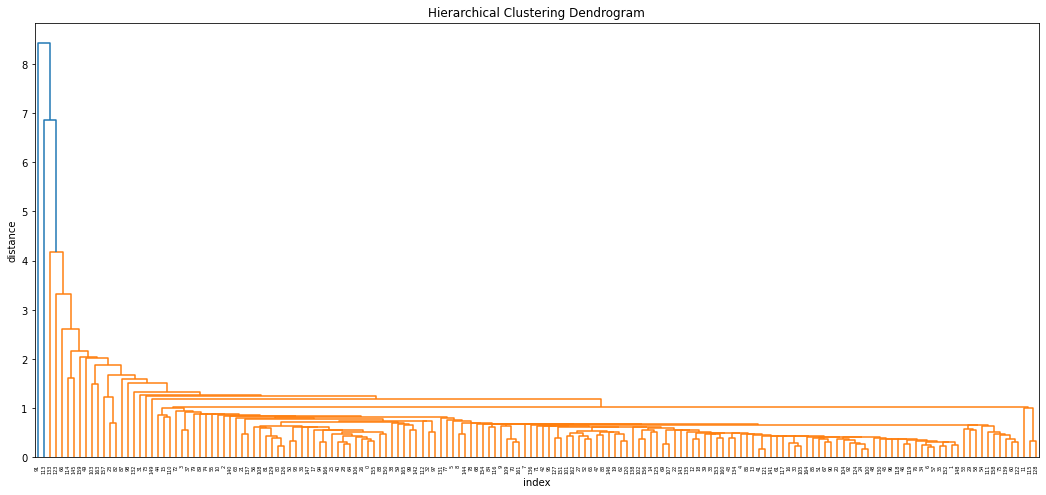

In [29]:
# Single Linkage

plt.figure(figsize=[18,8])

mergings_s = linkage(country_scaled, method="single", metric='euclidean')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')

dendrogram(mergings_s)
plt.show()

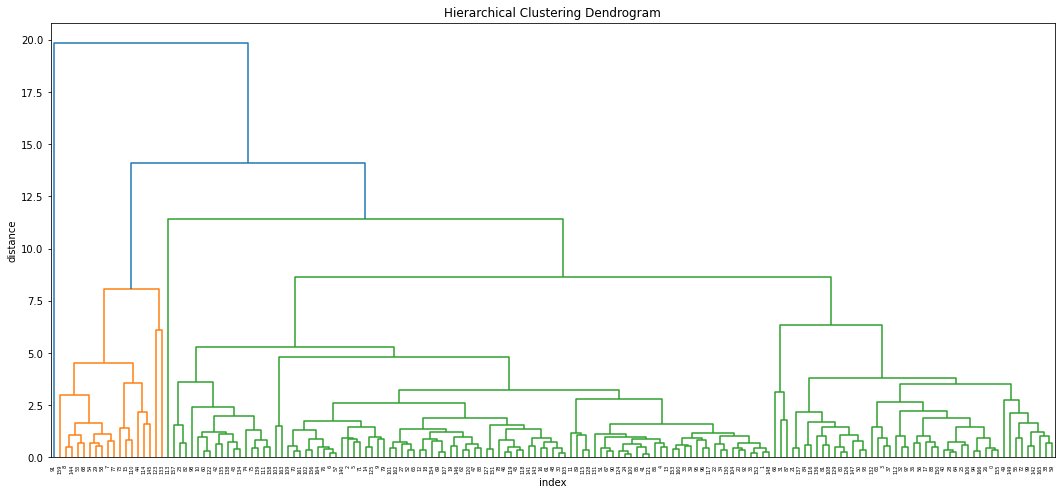

In [30]:
# Complete Linkage

plt.figure(figsize=[18,8])

mergings_c = linkage(country_scaled, method="complete", metric='euclidean')

plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('index')
plt.ylabel('distance')

dendrogram(mergings_c)
plt.show()

##### Insight:
- From the above Dendrograms, it is evident that 'Complete Linkage' give a better cluster formation. So we will use Complete linkage output for our further analysis. 
- We will build two iterations of clustering with 3 & 4 clusters (based on inputs from the above Dendrogram with Complete Linkage) and analyse the output.

#### Iteration with Clusters = 3

In [31]:
cluster_labels_3 = cut_tree(mergings_c, n_clusters=3).reshape(-1, )
cluster_labels_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [32]:
# Creating a new columns for the labels

country_lab_1 = country.copy()
country_lab_1['Cluster_labels_3'] = cluster_labels_3
country_lab_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


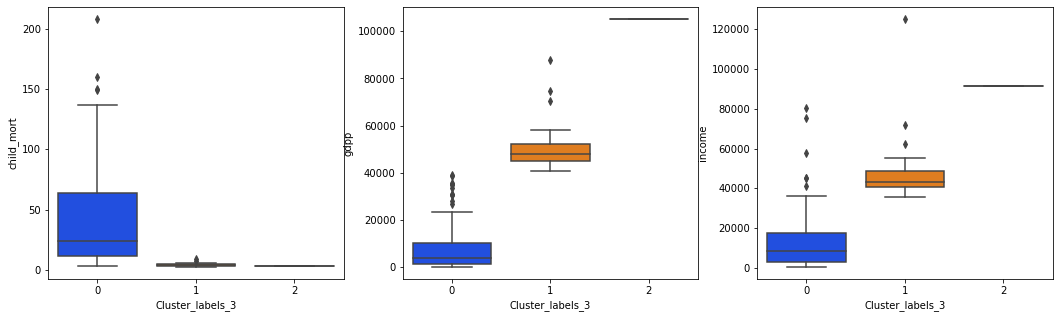

In [33]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_labels_3', y='child_mort', data=country_lab_1, palette="bright")

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_labels_3', y='gdpp', data=country_lab_1, palette="bright")

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_labels_3', y='income', data=country_lab_1, palette="bright")

plt.show()

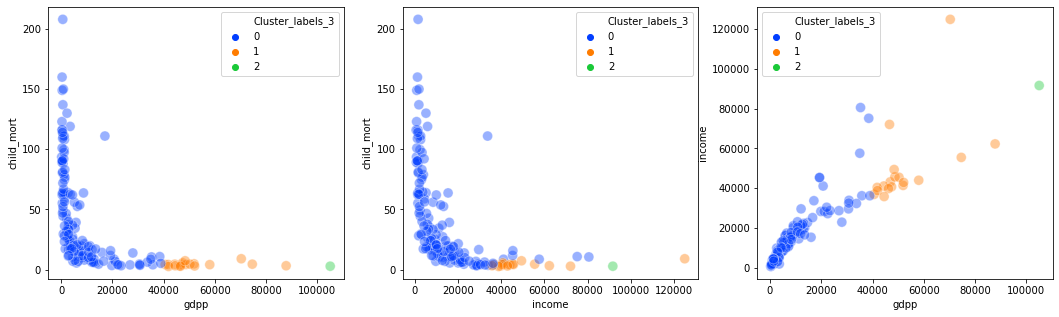

In [34]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster_labels_3',
                data=country_lab_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='Cluster_labels_3',
                data=country_lab_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='Cluster_labels_3',
                data=country_lab_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [35]:
# Cluster count

country_lab_1['Cluster_labels_3'].value_counts()

0    148
1     18
2      1
Name: Cluster_labels_3, dtype: int64

In [36]:
# Checking the countries that fall under Cluster 2

country_lab_1[country_lab_1['Cluster_labels_3']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2


In [37]:
# Checking the countries that fall under Cluster 1

country_lab_1[country_lab_1['Cluster_labels_3']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1


##### Insight:
- Our analysis for the cluster 1 & 2 is for the countries which are termed as Developing & Developed. As many of the Under-Developed countries are in cluster 0, which is correct.

#### Iteration with Clusters = 4

In [38]:
cluster_labels_4 = cut_tree(mergings_c, n_clusters=4).reshape(-1, )
cluster_labels_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [39]:
# Creating a new columns for the labels

country_lab_1['Cluster_labels_4'] = cluster_labels_4
country_lab_1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


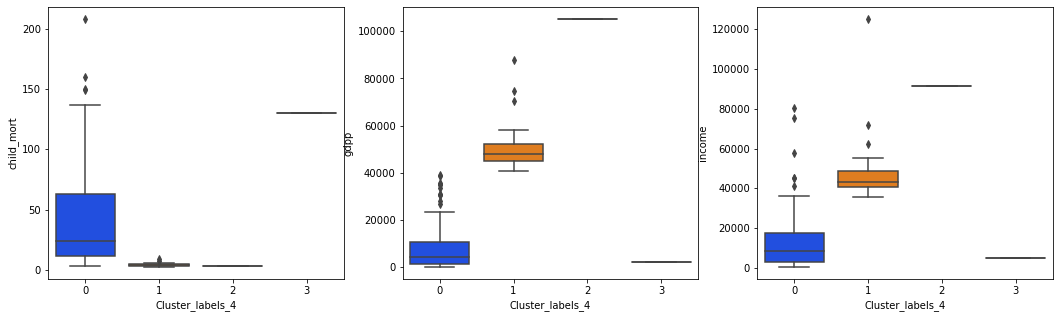

In [40]:
# Box plot on various variable against the CLUSTER_ID to visualize the spread of the data

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_labels_4', y='child_mort', data=country_lab_1, palette="bright")

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_labels_4', y='gdpp', data=country_lab_1, palette="bright")

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_labels_4', y='income', data=country_lab_1, palette="bright")

plt.show()

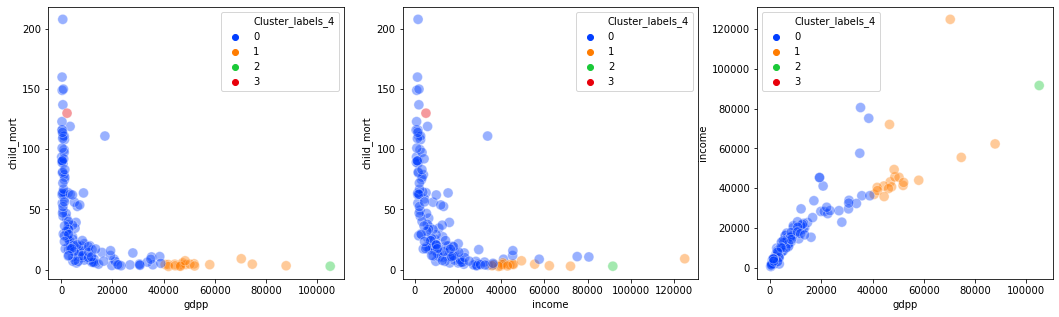

In [41]:
# Scatter plot on various variables to visualize the clusters based on them

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster_labels_4',
                data=country_lab_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='Cluster_labels_4',
                data=country_lab_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='Cluster_labels_4',
                data=country_lab_1, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)
plt.show()

In [42]:
# Cluster count

country_lab_1['Cluster_labels_4'].value_counts()

0    147
1     18
3      1
2      1
Name: Cluster_labels_4, dtype: int64

In [43]:
# Checking the countries that fall under Cluster 2

country_lab_1[country_lab_1['Cluster_labels_4']==2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4
91,Luxembourg,2.8,183750.0,8158.5,149100.0,91700,3.62,81.3,1.63,105000,2,2


In [44]:
# Checking the countries that fall under Cluster 3

country_lab_1[country_lab_1['Cluster_labels_4']==3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,0,3


In [45]:
# Checking the countries that fall under Cluster 1

country_lab_1[country_lab_1['Cluster_labels_4']==1]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4
7,Australia,4.8,10276.2,4530.87,10847.1,41400,1.160,82.0,1.93,51900,1,1
8,Austria,4.3,24059.7,5159.00,22418.2,43200,0.873,80.5,1.44,46900,1,1
15,Belgium,4.5,33921.6,4750.80,33166.8,41100,1.880,80.0,1.86,44400,1,1
29,Canada,5.6,13793.4,5356.20,14694.0,40700,2.870,81.3,1.63,47400,1,1
44,Denmark,4.1,29290.0,6612.00,25288.0,44000,3.220,79.5,1.87,58000,1,1
53,Finland,3.0,17879.4,4134.90,17278.8,39800,0.351,80.0,1.87,46200,1,1
54,France,4.2,10880.8,4831.40,11408.6,36900,1.050,81.4,2.03,40600,1,1
58,Germany,4.2,17681.4,4848.80,15507.8,40400,0.758,80.1,1.39,41800,1,1
68,Iceland,2.6,22374.6,3938.60,18142.7,38800,5.470,82.0,2.20,41900,1,1
73,Ireland,4.2,50161.0,4475.53,42125.5,45700,-3.220,80.4,2.05,48700,1,1


##### Insight:
- As we clearly when Cluster = 4, there seems Nigeria in a separate cluster which might be a contender for the dire aid.
- We will take Cluster = 3, as it seems a equal distribution of the countries.

In [46]:
country_lab_1

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,1384.02,155.9250,1565.190,2950,2.62,63.0,3.50,2970,0,0
163,Venezuela,17.1,3847.50,662.8500,2376.000,16500,45.90,75.4,2.47,13500,0,0
164,Vietnam,23.3,943.20,89.6040,1050.620,4490,12.10,73.1,1.95,1310,0,0
165,Yemen,56.3,393.00,67.8580,450.640,4480,23.60,67.5,4.67,1310,0,0


#### Interpreting the clusters from Hierarchical mode

In [47]:
country_lab_1_analysis = country_lab_1.groupby(['Cluster_labels_3']).mean()
country_lab_1_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_4
Cluster_labels_3,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000


In [48]:
# Counting the each cluster

country_lab_1_analysis['Observations'] = country_lab_1[['Cluster_labels_3', 'child_mort']].groupby(
    ['Cluster_labels_3']).count()
country_lab_1_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_4,Observations
Cluster_labels_3,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1


In [49]:
# Adding a proportion field in the dataset

country_lab_1_analysis['Proportion'] = round(country_lab_1_analysis['Observations']/country_lab_1_analysis['Observations'].sum(),2)
country_lab_1_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_4,Observations,Proportion
Cluster_labels_3,,,,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946,0.02027,148,0.89
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556,1.00000,18,0.11
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.00000,1,0.01


<Figure size 576x360 with 0 Axes>

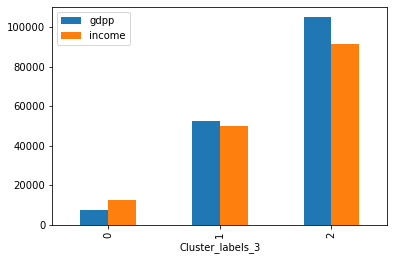

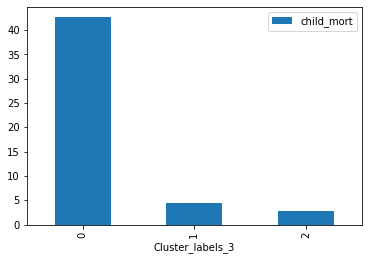

In [50]:
plt.figure(figsize=(8, 5))

country_lab_1_plot1=country_lab_1[['Cluster_labels_3','gdpp','income']].copy()
country_lab_1_plot1=country_lab_1_plot1.groupby('Cluster_labels_3').mean()
country_lab_1_plot1.plot.bar()

country_lab_1_plot2=country_lab_1[['Cluster_labels_3','child_mort']].copy()
country_lab_1_plot2=country_lab_1_plot2.groupby('Cluster_labels_3').mean()
country_lab_1_plot2.plot.bar()

plt.show()

##### Insight:
- Cluster 0 has the highest mortality rate of around 42, which can be seen from the above plot.
- Cluster 0 also has the lowest GDPP and Income.
- These information makes the Correct candidate for the Financial Aid. 
- Hierarchical Clustering is clustering 0 as 89% of the dataset, which is bit wierd.
- We will compare these results with K-means Clustering for the optimal candidate to provide a Financial Aid.

### Finding the Optimal Number of Clusters

#### SSD (Elbow Curve)

In [51]:
# Checking the dataframe

country_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


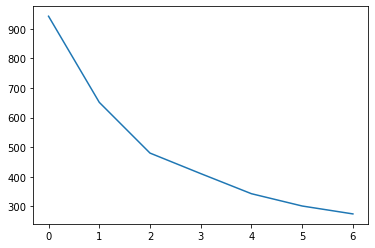

In [52]:
# Elbow-Curve / SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

#### Silhouette Analysis

In [53]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(country_scaled)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(country_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.42914711278370843
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.3927936961757552
For n_clusters=7, the silhouette score is 0.3065505636750877
For n_clusters=8, the silhouette score is 0.3103404095406525


##### Insight:
- From the Silhouette Analysis and SSD analysis, we can take the number of clusters = 3,4,5. 
- We will try out 3 iteration in K-means Clustering.

## K-Means Clustering

### Iteration with K = 3 (3 Clusters)

In [54]:
kmeans_3 = KMeans(n_clusters=3, max_iter=500, init='k-means++', n_init=10, random_state= 100)
kmeans_3.fit(country_scaled)

KMeans(max_iter=500, n_clusters=3, random_state=100)

In [55]:
kmeans_3.labels_


array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [56]:
# Creating a new dataframe

country_k = country_lab_1.copy()
country_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


In [57]:
# Assigning the labels

country_k['Cluster_k_3'] = kmeans_3.labels_
country_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4,Cluster_k_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,0


In [58]:
# Checking the counts of the clusters

country_k['Cluster_k_3'].value_counts()

0    91
1    48
2    28
Name: Cluster_k_3, dtype: int64

#### Visualizing the clustered data

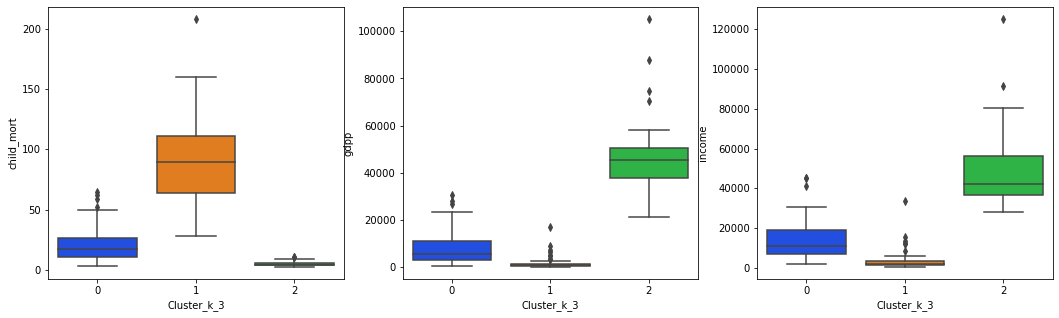

In [59]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_k_3', y='child_mort',
            data=country_k, palette="bright")

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_k_3', y='gdpp',
            data=country_k, palette="bright")

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_k_3', y='income',
            data=country_k, palette="bright")

plt.show()

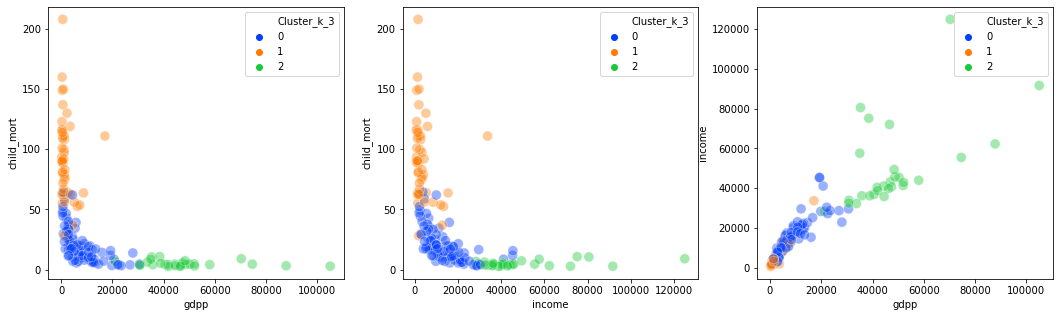

In [60]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster_k_3',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='Cluster_k_3',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='Cluster_k_3',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.show()

In [61]:
# Checking the cluster data

country_k.groupby(['Cluster_k_3']).mean().sort_values(['child_mort'], ascending=False)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4
Cluster_k_3,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286


##### Insight:
- Cluster 1 seems to have a high child mortality rate and low gdp.
- Cluster 0 also seems to have a high child mortality and low gdp compared to 2.

In [62]:
# Checking the countries in Cluster 1

country_k[['country','child_mort', 'income','gdpp']][country_k['Cluster_k_3']==1].sort_values(['child_mort'], 
                                                                                              ascending=False)

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
25,Burkina Faso,116.0,1430,575
37,"Congo, Dem. Rep.",116.0,609,334


In [63]:
# Checking the countries in Cluster 0

country_k[['country','child_mort', 'income','gdpp']][country_k['Cluster_k_3']==0].sort_values(['child_mort'], 
                                                                                              ascending=False)

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
...,...,...,...,...
138,South Korea,4.1,30400,22100
122,Portugal,3.9,27200,22500
60,Greece,3.9,28700,26900
43,Czech Republic,3.4,28300,19800


### Iteration with K = 4 (4 Clusters)

In [64]:
kmeans_4 = KMeans(n_clusters=4, max_iter=500, init='k-means++', n_init=10, random_state= 100)
kmeans_4.fit(country_scaled)

KMeans(max_iter=500, n_clusters=4, random_state=100)

In [65]:
kmeans_4.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 3, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 0, 2, 1, 1, 0, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [66]:
# Assigning the labels

country_k['Cluster_k_4'] = kmeans_4.labels_
country_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4,Cluster_k_3,Cluster_k_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,1,1
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,1,1
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,0,0


In [67]:
# Checking the counts of the clusters

country_k['Cluster_k_4'].value_counts()

0    88
1    48
2    30
3     1
Name: Cluster_k_4, dtype: int64

#### Visualizing the Clustered data

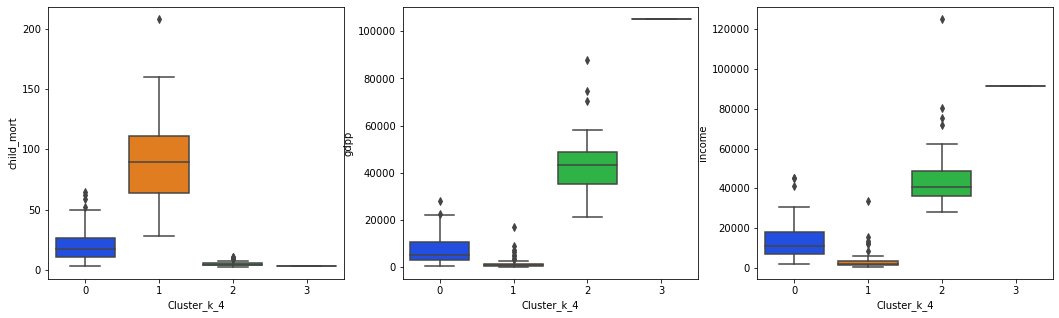

In [68]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_k_4', y='child_mort',
            data=country_k, palette="bright")

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_k_4', y='gdpp',
            data=country_k, palette="bright")

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_k_4', y='income',
            data=country_k, palette="bright")

plt.show()

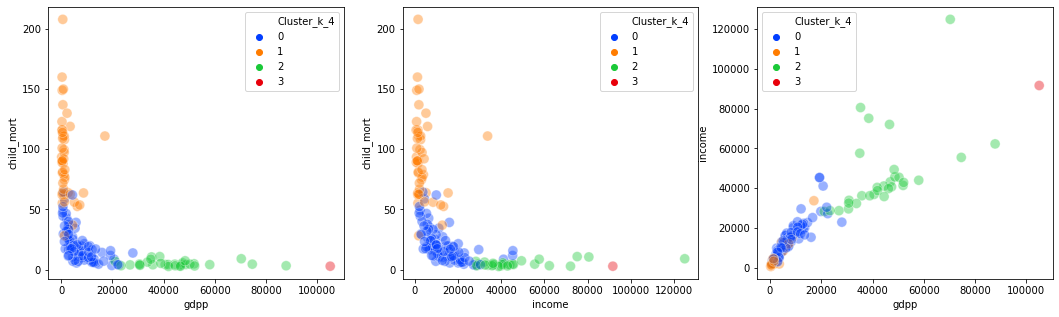

In [69]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster_k_4',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='Cluster_k_4',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='Cluster_k_4',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.show()

In [70]:
# Checking the cluster data

country_k.groupby(['Cluster_k_4']).mean().sort_values(['child_mort'], ascending=False)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4,Cluster_k_3
Cluster_k_4,,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.0,0.0625,1.0
0,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364,0.0,0.0000,0.0
2,5.006667,23900.726667,4010.316333,20228.370000,46676.666667,2.741567,80.480000,1.791667,44103.333333,0.6,0.6000,1.8
3,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000,2.0,2.0000,2.0


##### Insight:
- From the Cluster data, Cluster 1 seems to be have a high child mortality rate and lowest gdpp compared to others.
- Cluster 0 also seems to have a high child mortality rate and low gdpp compared to others.

In [71]:
# Checking the countries in Cluster 1

country_k[['country','child_mort', 'income','gdpp']][country_k['Cluster_k_4']==1].sort_values(['child_mort'], 
                                                                                              ascending=False)

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
113,Nigeria,130.0,5150,2330
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
25,Burkina Faso,116.0,1430,575
37,"Congo, Dem. Rep.",116.0,609,334


In [72]:
# Checking the countries in Cluster 0

country_k[['country','child_mort', 'income','gdpp']][country_k['Cluster_k_4']==0].sort_values(['child_mort'], 
                                                                                              ascending=False)

,country,child_mort,income,gdpp
107,Myanmar,64.4,3720,988
154,Turkmenistan,62.0,9940,4440
69,India,58.8,4410,1350
146,Tajikistan,52.4,2110,738
12,Bangladesh,49.4,2440,758
...,...,...,...,...
14,Belarus,5.5,16200,6030
51,Estonia,4.5,22700,14600
138,South Korea,4.1,30400,22100
122,Portugal,3.9,27200,22500


### Iteration with K = 5 (5 Clusters)

In [73]:
kmeans_5 = KMeans(n_clusters=5, max_iter=500, init='k-means++', n_init=10, random_state= 100)
kmeans_5.fit(country_scaled)

KMeans(max_iter=500, n_clusters=5, random_state=100)

In [74]:
kmeans_5.labels_

array([2, 0, 0, 2, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 4, 0, 2, 0, 0, 0, 2,
       0, 4, 0, 2, 2, 0, 2, 4, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 4, 0,
       4, 0, 0, 0, 0, 2, 2, 0, 0, 4, 4, 2, 2, 0, 4, 2, 4, 0, 0, 2, 2, 0,
       2, 0, 4, 0, 0, 0, 2, 4, 4, 4, 0, 4, 0, 0, 2, 2, 4, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 4, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       4, 4, 2, 3, 4, 0, 2, 0, 0, 0, 0, 0, 4, 4, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 4, 2, 2, 0, 4, 0, 0, 2, 0, 4, 4, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 4, 4, 4, 0, 0, 0, 0, 0, 2, 2])

In [75]:
# Assigning the labels

country_k['Cluster_k_5'] = kmeans_5.labels_
country_k.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4,Cluster_k_3,Cluster_k_4,Cluster_k_5
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,0,1,1,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0,0,0,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0,0,0,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,0,1,1,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0,0,0,0


In [76]:
# Checking the counts of the clusters

country_k['Cluster_k_5'].value_counts()

0    87
2    47
4    30
1     2
3     1
Name: Cluster_k_5, dtype: int64

#### Visualizing the clustered data

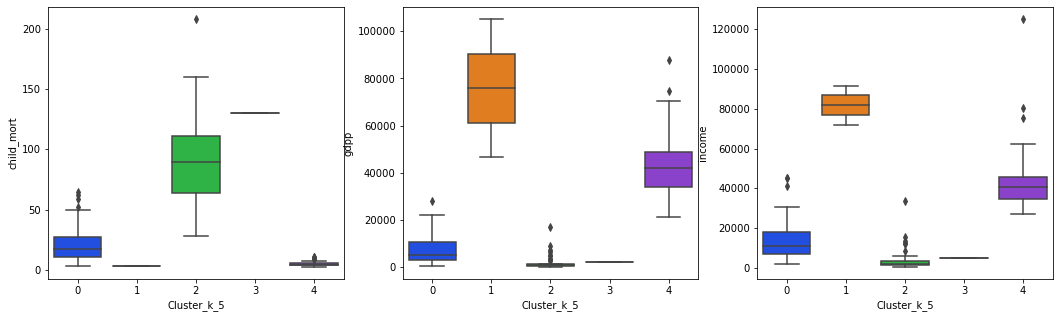

In [77]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='Cluster_k_5', y='child_mort',
            data=country_k, palette="bright")

plt.subplot(1, 3, 2)
sns.boxplot(x='Cluster_k_5', y='gdpp',
            data=country_k, palette="bright")

plt.subplot(1, 3, 3)
sns.boxplot(x='Cluster_k_5', y='income',
            data=country_k, palette="bright")

plt.show()

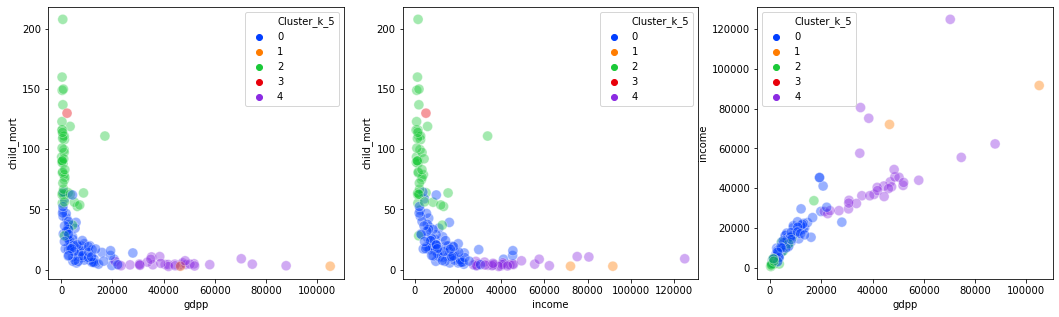

In [78]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='Cluster_k_5',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='Cluster_k_5',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='Cluster_k_5',
                data=country_k, legend='full', palette="bright", s=100, c='lightblue', alpha=.4)

plt.show()

In [79]:
# Checking the cluster data

country_k.groupby(['Cluster_k_5']).mean().sort_values(['child_mort'], ascending=False)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4,Cluster_k_3,Cluster_k_4
Cluster_k_5,,,,,,,,,,,,,
3,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000,0.000000,3.000000,1.000000,1.000000
2,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319,0.000000,0.000000,1.000000,1.000000
0,21.113793,3328.149408,460.000120,3404.497944,13297.586207,7.371506,73.147126,2.251954,7158.298851,0.000000,0.000000,0.000000,0.000000
4,5.043333,21018.310000,4031.304333,17806.070000,45180.000000,2.764533,80.383333,1.799667,43300.000000,0.566667,0.566667,1.733333,1.933333
1,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000,1.500000,1.500000,2.000000,2.500000


##### Insight:
- From the Cluster data, Cluster 3 seems to have high child mortality rate and low gdp.
- Cluster 2 also has low child_mort and low gdp.

In [80]:
# Checking the countries in Cluster 3

country_k[['country','child_mort', 'income','gdpp']][country_k['Cluster_k_5']==3].sort_values(['child_mort'], 
                                                                                              ascending=False)

,country,child_mort,income,gdpp
113,Nigeria,130.0,5150,2330


In [81]:
# Checking the countries in Cluster 2

country_k[['country','child_mort', 'income','gdpp']][country_k['Cluster_k_5']==2].sort_values(['child_mort'], 
                                                                                              ascending=False)

,country,child_mort,income,gdpp
66,Haiti,208.0,1500,662
132,Sierra Leone,160.0,1220,399
32,Chad,150.0,1930,897
31,Central African Republic,149.0,888,446
97,Mali,137.0,1870,708
112,Niger,123.0,814,348
3,Angola,119.0,5900,3530
25,Burkina Faso,116.0,1430,575
37,"Congo, Dem. Rep.",116.0,609,334
64,Guinea-Bissau,114.0,1390,547


##### Insight:
- From the above 3 Iterations of K-Means, we could see that using 3 Clusters provided a better output in terms of a balanced cluster size. So we will consider the 'K-Means with 3 Clusters' as our FINAL MODEL

### Interpreting the clusters from K-Means model 

In [82]:
#New dataframe for group by & analysis

country_k_analysis =  country_k.groupby(['Cluster_k_3']).mean().sort_values(['child_mort'], ascending = False)
country_k_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4,Cluster_k_4,Cluster_k_5
Cluster_k_3,,,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,1.000000,2.020833
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000,0.065934,0.175824
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286,2.035714,3.785714


In [83]:
# Creating a new field for count of observations in each cluster

country_k_analysis['Observations'] = country_k[['Cluster_k_3','child_mort']].groupby(['Cluster_k_3']).count()
country_k_analysis

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4,Cluster_k_4,Cluster_k_5,Observations
Cluster_k_3,,,,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,1.000000,2.020833,48
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000,0.065934,0.175824,91
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286,2.035714,3.785714,28


In [84]:
# Creating a new field for proportion of observations in each cluster

country_k_analysis['Proportion']=round(country_k_analysis['Observations']/country_k_analysis['Observations'].sum(),2)

In [85]:
# Sorted View

country_k_analysis[['child_mort','income','gdpp','Observations','Proportion']]


,child_mort,income,gdpp,Observations,Proportion
Cluster_k_3,,,,,
1,91.610417,3897.354167,1909.208333,48,0.29
0,20.357143,13968.021978,7979.912088,91,0.54
2,5.046429,50178.571429,48114.285714,28,0.17


<Figure size 576x360 with 0 Axes>

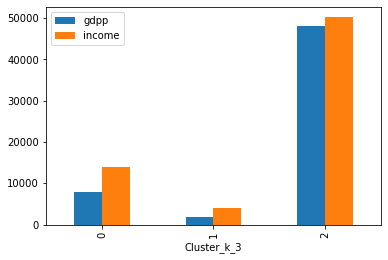

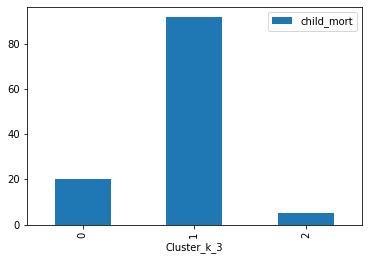

In [86]:
plt.figure(figsize=(8, 5))

country_k_plot1 = country_k[['Cluster_k_3','gdpp','income']].copy()
country_k_plot1 = country_k_plot1.groupby('Cluster_k_3').mean()
country_k_plot1.plot.bar()

country_k_plot2 = country_k[['Cluster_k_3','child_mort']].copy()
country_k_plot2 = country_k_plot2.groupby('Cluster_k_3').mean()
country_k_plot2.plot.bar()

##### Insight:
- From the above plot we can say that, Cluster 1 has the highest child mortality rate of around 92 and comparitively low gdp and income ranges when compared to others.
- Therefore, making this Cluster as one of the candidate for the Financial Aid from NGO.

### Renaming the clusters

In [87]:
country_k_analysis.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster_labels_3,Cluster_labels_4,Cluster_k_4,Cluster_k_5,Observations,Proportion
Cluster_k_3,,,,,,,,,,,,,,,
1,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333,0.000000,0.062500,1.000000,2.020833,48,0.29
0,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088,0.000000,0.000000,0.065934,0.175824,91,0.54
2,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714,0.714286,0.714286,2.035714,3.785714,28,0.17


In [88]:
country_k_analysis = country_k_analysis.rename({1: 'Under-Developed Countries',
                                                2: 'Developed Countries',
                                                0: 'Developing Countries'}).reset_index()

In [89]:
country_k_analysis[['Cluster_k_3','child_mort','income','gdpp','Observations','Proportion']]


,Cluster_k_3,child_mort,income,gdpp,Observations,Proportion
0,Under-Developed Countries,91.610417,3897.354167,1909.208333,48,0.29
1,Developing Countries,20.357143,13968.021978,7979.912088,91,0.54
2,Developed Countries,5.046429,50178.571429,48114.285714,28,0.17


### Analysing the 'Under-Developed Countries' clusters

In [90]:
country_k.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp', 'Cluster_labels_3',
       'Cluster_labels_4', 'Cluster_k_3', 'Cluster_k_4', 'Cluster_k_5'],
      dtype='object')

In [91]:
# Countries in Cluster_id = 0, save to a new dataframe, this will form our final cluster data

final_cluster = country_k[country_k['Cluster_k_3'] == 1].copy()
final_cluster = final_cluster[['country', 'child_mort', 'income', 'gdpp']]  #HERE

In [92]:
final_cluster.sort_values(['gdpp'], ascending=True)

,country,child_mort,income,gdpp
26,Burundi,93.6,764,231
88,Liberia,89.3,700,327
37,"Congo, Dem. Rep.",116.0,609,334
112,Niger,123.0,814,348
132,Sierra Leone,160.0,1220,399
93,Madagascar,62.2,1390,413
106,Mozambique,101.0,918,419
31,Central African Republic,149.0,888,446
94,Malawi,90.5,1030,459
50,Eritrea,55.2,1420,482


### Decision making on the Final Dataset

In [93]:
final_cluster.describe()

,child_mort,income,gdpp
count,48.000000,48.000000,48.000000
mean,91.610417,3897.354167,1909.208333
std,34.319855,5590.168621,2925.911009
min,28.100000,609.000000,231.000000
25%,63.675000,1390.000000,551.500000
50%,89.750000,1860.000000,932.000000
75%,111.000000,3522.500000,1465.000000
max,208.000000,33700.000000,17100.000000


##### Insight:
- We need to fetch the median values so as to interpret the model in a well manner. As the variance in the data is quiet large therefore mean should be avoided and Median value must be taken into consideration.
- There are values with high mortality rate and high gdp, therefore we should also avoid these as providing the financial aid won't make much of a difference.
- So, we are looking for the countries below the Median of the gdp value.

#### Fetching the Final data with cluster less than the gdpp median

In [94]:
Under_Developed_Country = country[country['gdpp'] <= 932]

In [95]:
Under_Developed_Country[['country', 'income', 'child_mort', 'gdpp']]

,country,income,child_mort,gdpp
0,Afghanistan,1610,90.2,553
12,Bangladesh,2440,49.4,758
17,Benin,1820,111.0,758
25,Burkina Faso,1430,116.0,575
26,Burundi,764,93.6,231
27,Cambodia,2520,44.4,786
31,Central African Republic,888,149.0,446
32,Chad,1930,150.0,897
36,Comoros,1410,88.2,769
37,"Congo, Dem. Rep.",609,116.0,334


#### Taking the values less than the median of the income

In [96]:
Under_Developed_Country = Under_Developed_Country[Under_Developed_Country['income'] <= 1860]

In [97]:
Under_Developed_Country[['country', 'income', 'child_mort', 'gdpp']]

,country,income,child_mort,gdpp
0,Afghanistan,1610,90.2,553
17,Benin,1820,111.0,758
25,Burkina Faso,1430,116.0,575
26,Burundi,764,93.6,231
31,Central African Republic,888,149.0,446
36,Comoros,1410,88.2,769
37,"Congo, Dem. Rep.",609,116.0,334
50,Eritrea,1420,55.2,482
56,Gambia,1660,80.3,562
63,Guinea,1190,109.0,648


#### Now, taking the values greater than the median of the  Child Mortality

In [98]:
Under_Developed_Country = Under_Developed_Country[Under_Developed_Country['child_mort'] >= 90]

In [99]:
Under_Developed_Country[['country', 'income', 'child_mort', 'gdpp']]

,country,income,child_mort,gdpp
0,Afghanistan,1610,90.2,553
17,Benin,1820,111.0,758
25,Burkina Faso,1430,116.0,575
26,Burundi,764,93.6,231
31,Central African Republic,888,149.0,446
37,"Congo, Dem. Rep.",609,116.0,334
63,Guinea,1190,109.0,648
64,Guinea-Bissau,1390,114.0,547
66,Haiti,1500,208.0,662
94,Malawi,1030,90.5,459


In [100]:
Under_Developed_Country.shape

(14, 10)

## Descriptive Statistics of the 'Under-Developed Countries'

In [101]:
UDC_top_10 = Under_Developed_Country[['country', 'income', 'child_mort', 'gdpp']].head(10).copy()

In [102]:
UDC_top_10

,country,income,child_mort,gdpp
0,Afghanistan,1610,90.2,553
17,Benin,1820,111.0,758
25,Burkina Faso,1430,116.0,575
26,Burundi,764,93.6,231
31,Central African Republic,888,149.0,446
37,"Congo, Dem. Rep.",609,116.0,334
63,Guinea,1190,109.0,648
64,Guinea-Bissau,1390,114.0,547
66,Haiti,1500,208.0,662
94,Malawi,1030,90.5,459


In [103]:
UDC_top_10.describe()

,income,child_mort,gdpp
count,10.000000,10.000000,10.000000
mean,1223.100000,119.730000,521.300000
std,393.260572,35.448744,158.230528
min,609.000000,90.200000,231.000000
25%,923.500000,97.450000,449.250000
50%,1290.000000,112.500000,550.000000
75%,1482.500000,116.000000,629.750000
max,1820.000000,208.000000,758.000000


## Univariate Analysis of the Under-Developed Countries

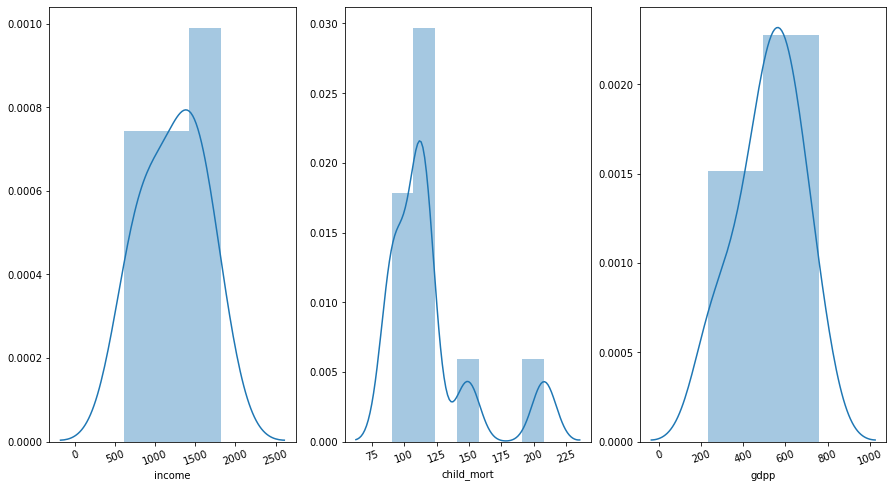

In [104]:
plt.figure(figsize=[15,8])

plt.subplot(1,3,1)
sns.distplot(UDC_top_10.income)
plt.xticks(rotation=20)

plt.subplot(1,3,2)
sns.distplot(UDC_top_10.child_mort)
plt.xticks(rotation=20)

plt.subplot(1,3,3)
sns.distplot(UDC_top_10.gdpp)
plt.xticks(rotation=20)

plt.show()

## Bivariate Analysis of the Under-Developed Countries

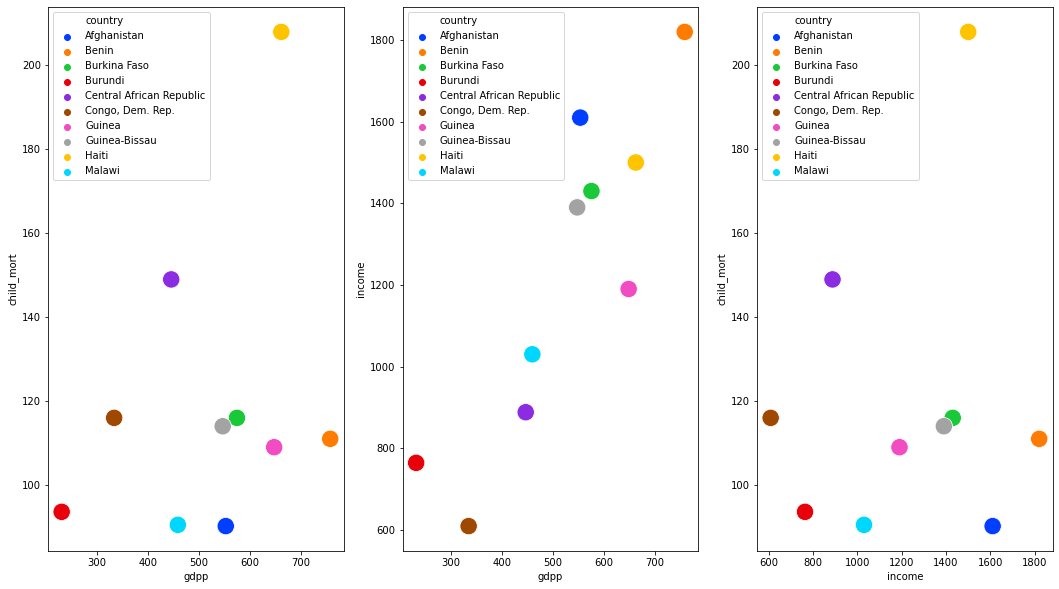

In [105]:
plt.figure(figsize=(18, 10))

plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')

plt.subplot(1, 3, 2)
sns.scatterplot(x='gdpp', y='income', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')

plt.subplot(1, 3, 3)
sns.scatterplot(x='income', y='child_mort', hue='country',
                data=UDC_top_10, legend='full', palette="bright", s=300, c='lightblue')

plt.show()

## Conclusion:
- From the Clustering analysis we got the top 10 countries which are in need of the Financial Aid from the NGO.
- Based on the Clustering Methodologies we have found the top 10 countries which has low gdpp, high child mortality rate and low income.

In [106]:
# The top 10 countries recommended for the Financial Aid from NGO

UDC_top_10 = UDC_top_10.sort_values(['gdpp'], ascending=True)
UDC_top_10

,country,income,child_mort,gdpp
26,Burundi,764,93.6,231
37,"Congo, Dem. Rep.",609,116.0,334
31,Central African Republic,888,149.0,446
94,Malawi,1030,90.5,459
64,Guinea-Bissau,1390,114.0,547
0,Afghanistan,1610,90.2,553
25,Burkina Faso,1430,116.0,575
63,Guinea,1190,109.0,648
66,Haiti,1500,208.0,662
17,Benin,1820,111.0,758
